# 2주차 과제
- 60171100 윤민혁

- 행복지수에 영향을 미치는 요인 분석
- https://www.kaggle.com/mathurinache/world-happiness-report

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [146]:
happiness = pd.read_csv('./data/world-happiness-report-2021.csv')
happiness

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [147]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

- 변수설명
    - Country name : 나라 이름
    - Regional indicator : 대륙
    - Ladder score : 행복지수
    - Life Ladder : 삶의 만족도
    - Log GDP per capita : 1인당 GDP
    - Social support : 사회적 지원
    - Healthy life expectancy at birth : 기대수명
    - Freedom to make life choices : 삶의 자율성
    - Generosity : 관대함
    - Perceptions of corruption : 부패정도

In [148]:
happiness['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [149]:
# 대륙별 행복지수도 비교하기 위해 숫자로 변환
happiness = happiness.replace({'Western Europe':1, 'North America and ANZ':2, 'Middle East and North Africa':3,
                              'Latin America and Caribbean':4, 'Central and Eastern Europe':5, 'East Asia':6,
                              'Southeast Asia':7, 'Commonwealth of Independent States':8,'Sub-Saharan Africa':9,'South Asia':10})

In [150]:
# 설명력을 나타내는 칼럼 제거
happiness = happiness.drop(['Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy',
                           'Explained by: Freedom to make life choices','Explained by: Freedom to make life choices','Explained by: Generosity',
                           'Explained by: Perceptions of corruption','Dystopia + residual'], axis=1)

<AxesSubplot:>

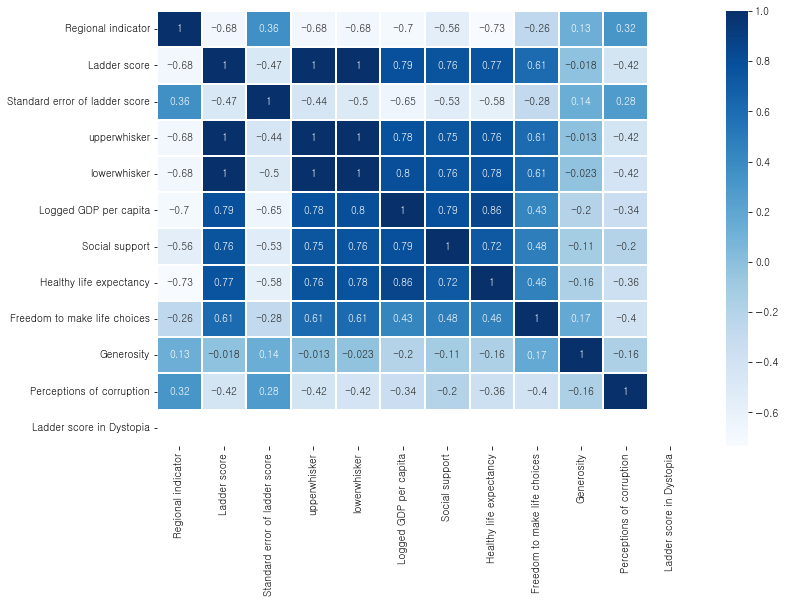

In [151]:
#상관관계 분석
plt.figure(figsize=(12, 8))
sns.heatmap(happiness.corr(), annot=True, cmap='Blues', linewidths=0.2)

- 대체로 높은 상관관계를 보여준다

<AxesSubplot:xlabel='Country name', ylabel='Ladder score'>

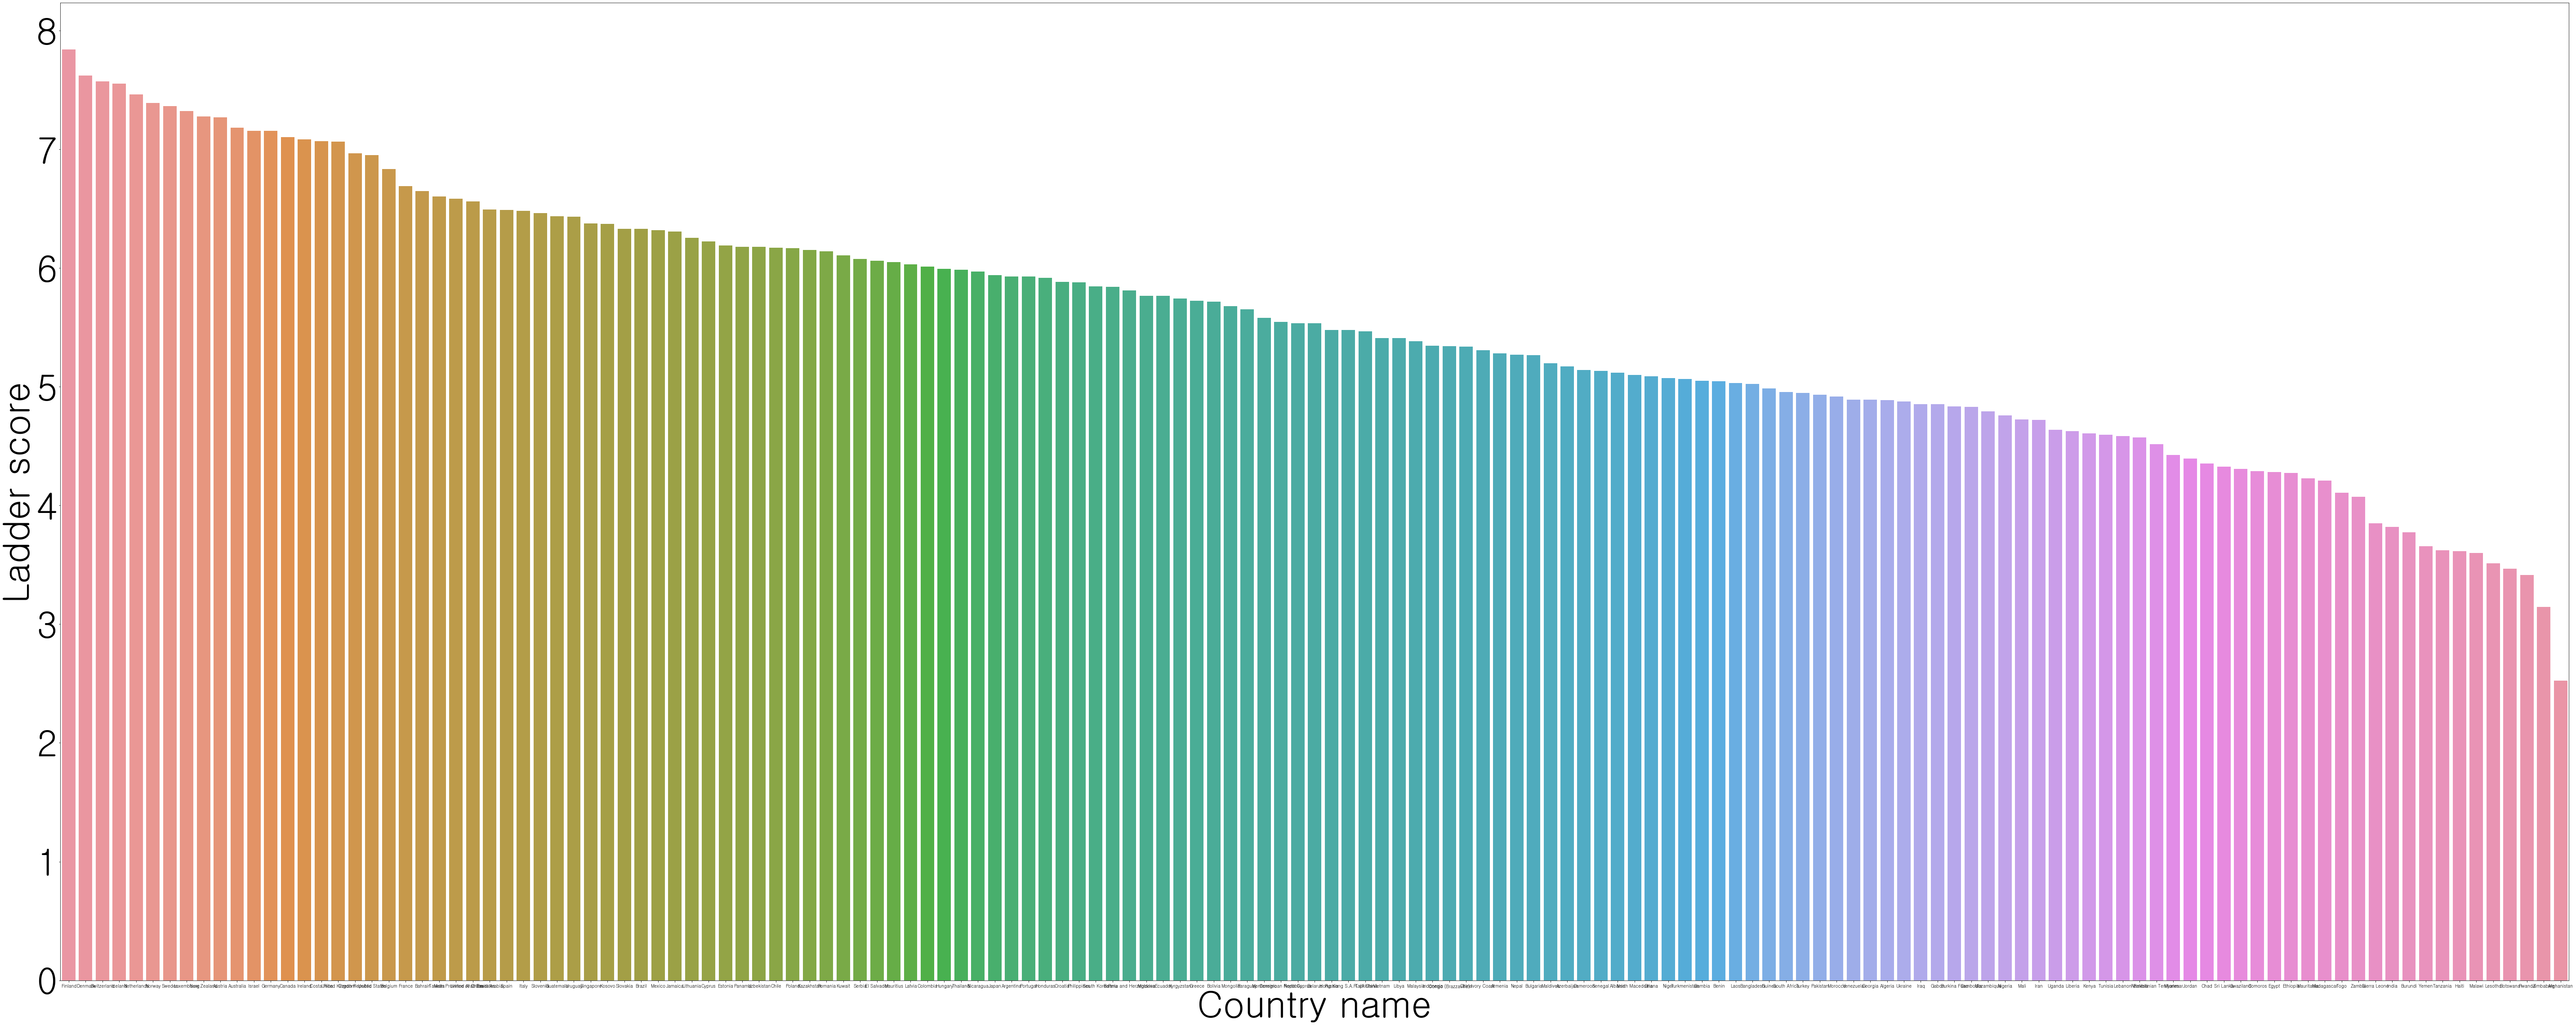

In [152]:
# 나라별 행복지수 내림차순으로 비교
plt.figure(figsize=(100,40))
plt.rc('axes', labelsize=80)
plt.rc('ytick', labelsize=80)
sns.barplot(x='Country name', y='Ladder score', data=happiness)

<AxesSubplot:xlabel='Country name', ylabel='upperwhisker'>

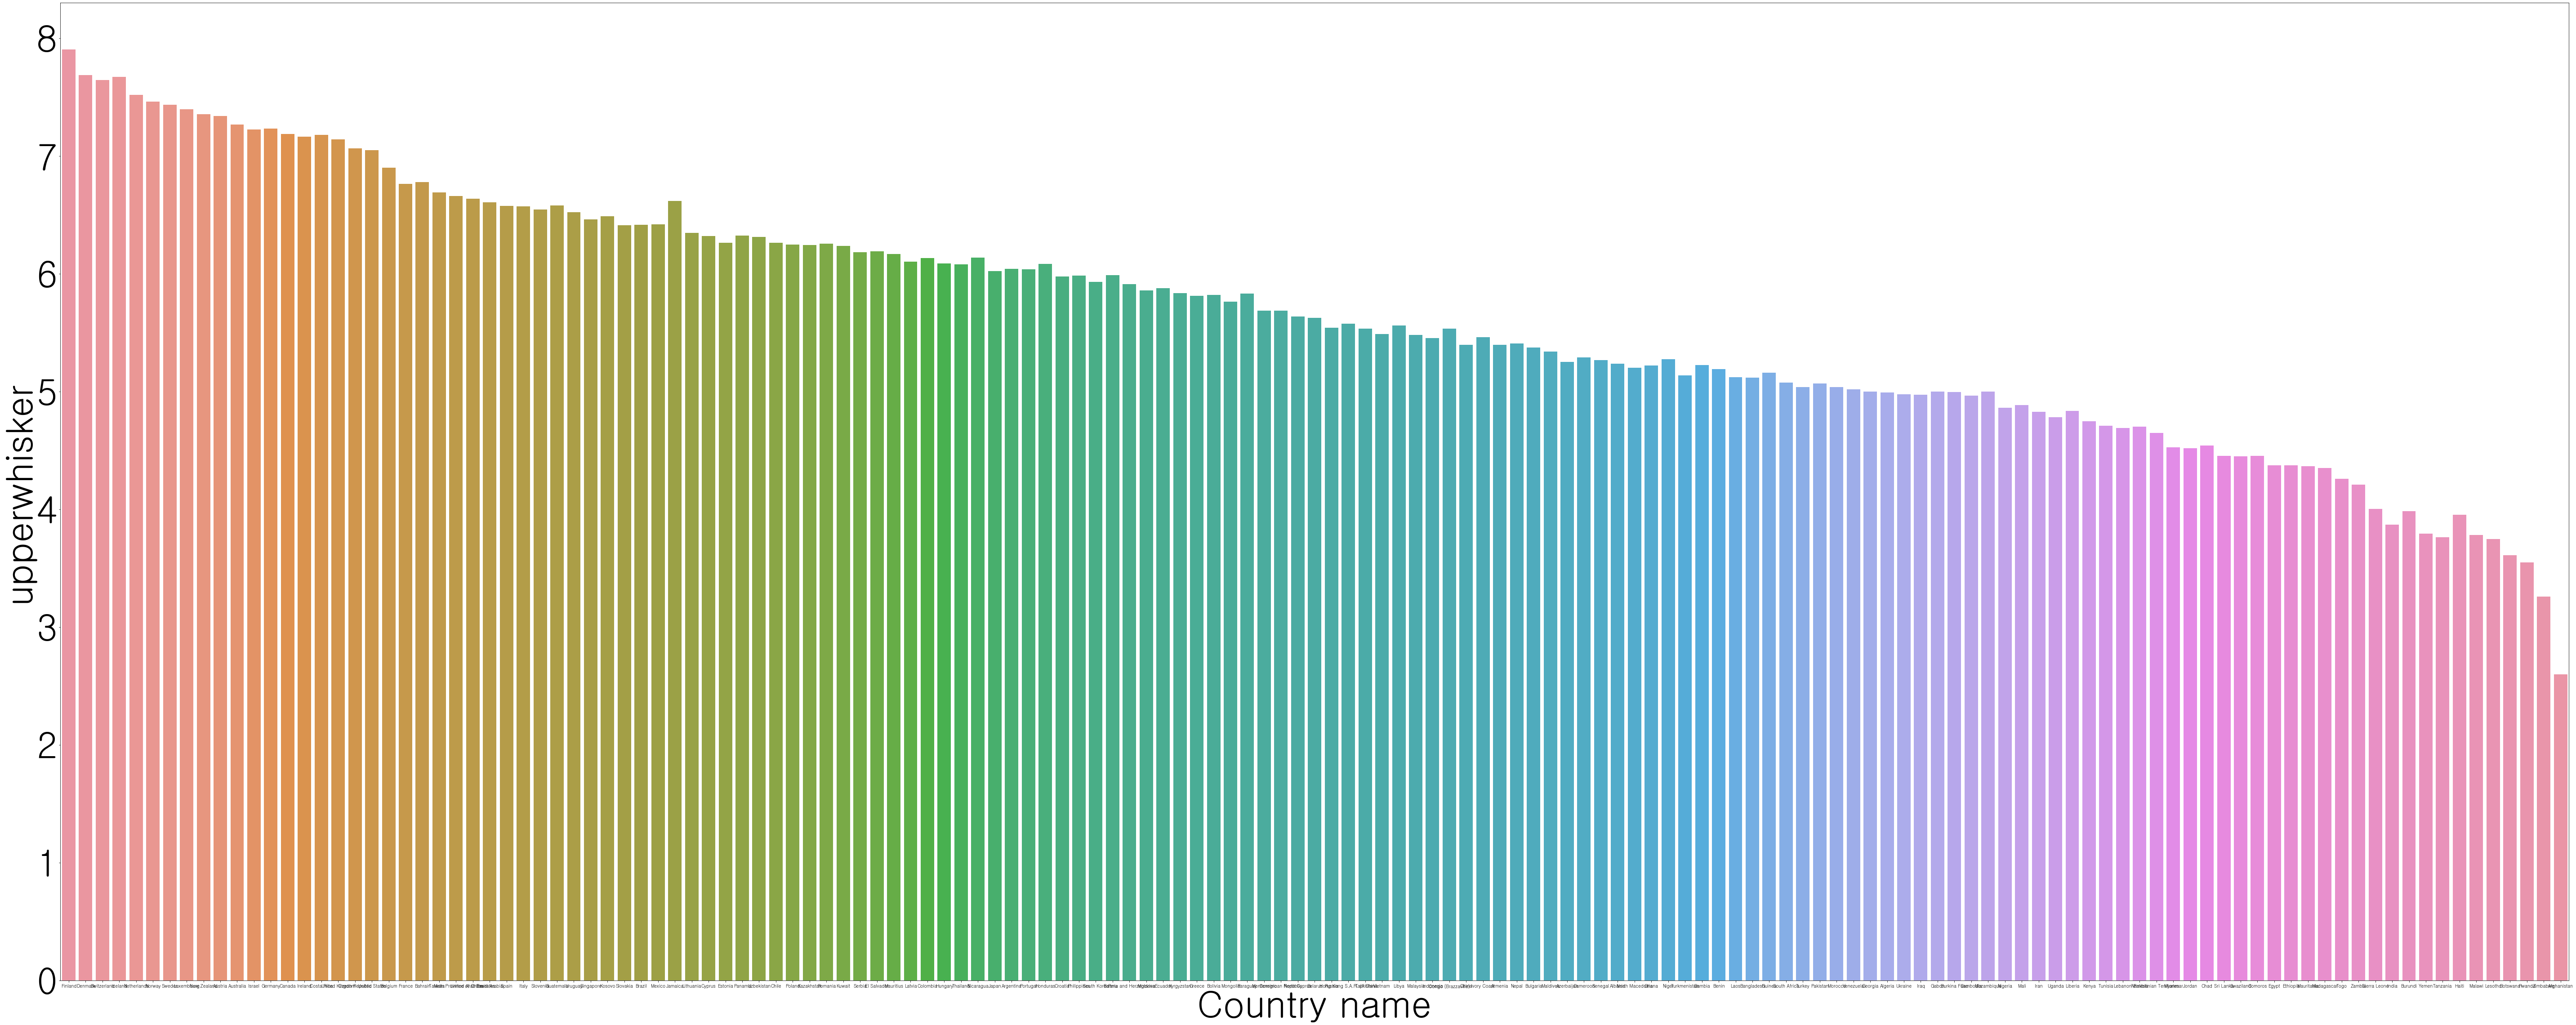

In [153]:
# 행복지수 순서대로 나라별 최대 행복지수 비교
plt.figure(figsize=(100,40))
plt.rc('axes', labelsize=80)
plt.rc('ytick', labelsize=80)
sns.barplot(x='Country name', y='upperwhisker', data=happiness)

- 위 그래프와 다르게 아래 그래프는 조사 시 최대 결과값을 나타내고 있다. 행복지수 순위와 다르게 중간중간 일정하지 않은 부분이 존재한다.
- 이를 통해 알 수 있는 것은 차이가 심한 나라는 양극화가 어느정도 존재한다는 것을 추측해볼 수 있다.

<AxesSubplot:xlabel='Regional indicator', ylabel='Ladder score'>

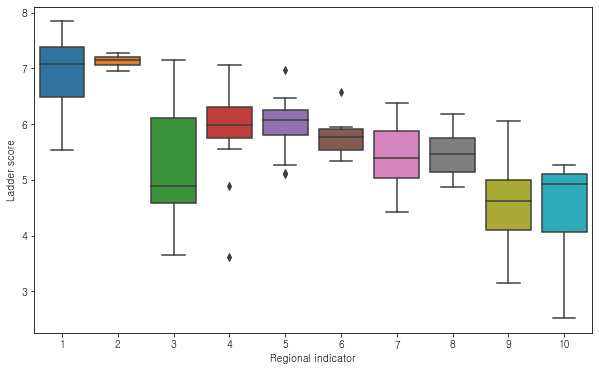

In [154]:
# 대륙별 행복지수
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.boxplot(x='Regional indicator', y='Ladder score', data=happiness)

- 대륙별로 행복지수 값을 boxplot으로 나타내 보았다.
- 1번인 Western Europe이 가장 높은 값을 나타내고 있다.
- 10번인 South Asia에서 가장 낮은 값이 나오며 대체적으로 행복지수가 낮은 것을 확인할 수 있었다.

In [155]:
# 어떤 항목이 많은 영향을 끼치는지 분석하기 위해 행복지수가 높은 상위 10개국과 하위 10개국으로 새로운 데이터프레임 생성
happiness_top10 = happiness.head(10)
happiness_bottom10 = happiness.tail(10)
happiness_new = pd.concat([happiness_top10,happiness_bottom10])
happiness_new

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,1,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43
1,Denmark,1,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43
2,Switzerland,1,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43
3,Iceland,1,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43
4,Netherlands,1,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43
5,Norway,1,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43
6,Sweden,1,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43
7,Luxembourg,1,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43
8,New Zealand,2,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43
9,Austria,1,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,2.43


Text(0.5, 1.0, '사회적 지원과 삶의 자유도(주황색 : 사회적 지원, 파란색 : 삶의 자유도)')

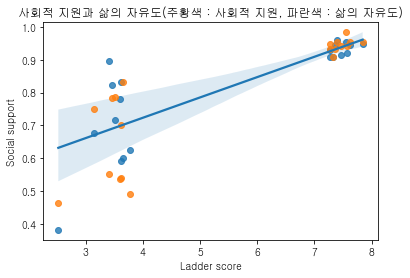

In [156]:
# 상위 10개국과 하위 10개국의 삶의 자유도에 대해 시각화
sns.regplot(data=happiness_new, x='Ladder score', y='Freedom to make life choices')
sns.regplot(data=happiness_new, x='Ladder score', y='Social support', fit_reg=False)
plt.title('사회적 지원과 삶의 자유도(주황색 : 사회적 지원, 파란색 : 삶의 자유도)')

- 대체로 행복지수가 높으면 삶의 자유도와 사회적 지원이 높은것을 확인할 수 있다.
- 하지만 행복지수가 낮은 경우에는 삶의 자유도는 높지만 지원이 낮거나 둘다 낮은 경우가 많다.

<AxesSubplot:xlabel='Ladder score', ylabel='Perceptions of corruption'>

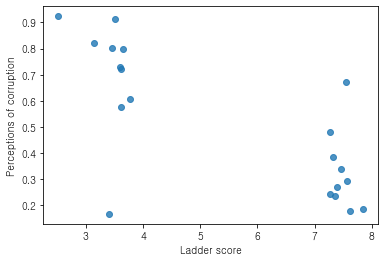

In [160]:
# 행복지수와 정부 부패도와의 관계 분석
sns.regplot(data=happiness_new, x='Ladder score', y='Perceptions of corruption', fit_reg=False)

- 대체로 행복지수가 높으면 권력자들의 부패도가 낮지만 모든 경우가 그렇지는 않다

<AxesSubplot:xlabel='Ladder score', ylabel='Healthy life expectancy'>

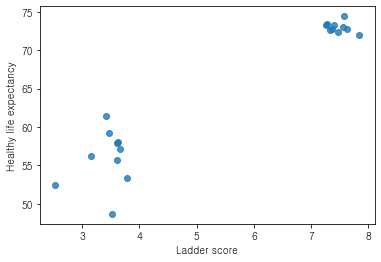

In [161]:
# 기대수명이 행복지수에 미치는 영향
sns.regplot(data=happiness_new, x='Ladder score', y='Healthy life expectancy', fit_reg=False)

- 행복지수가 높으면 기대수명도 덩달아 높은 것을 확인할 수 있다.